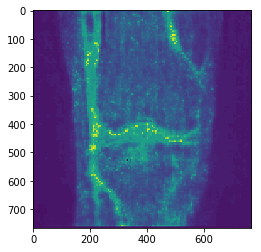

In [7]:
from PIL import Image
import numpy as np
import torch
import sys
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, '../')
from models.fft_utils import *

im = Image.open('uncertainty_map.png')
plt.imshow(im)

RFFT = RFFT().to(0)
IFFT = IFFT().to(0)
IRFFT = IRFFT().to(0)

grayim = torch.from_numpy(np.array(im)[:,:,:3].astype(np.float32)).div(255).permute(2,0,1).unsqueeze(0).norm(2,dim=1, keepdim=True)
plt.imshow(grayim[0][0])


In [ ]:
kspace = RFFT(grayim) / (grayim.shape[2]*grayim.shape[3])
plt.imshow(kspace.norm(2,dim=1)[0].log())
print(kspace.norm(2,dim=1)[0].sum(1))

In [ ]:
import scipy.misc as misc
unc = Image.open('individualImage_unc.png')
K = 128 + 1
P = 3
uncpatch = np.asarray(unc)[K*2:K*(2+1),K*P:K*(P+1),:]
# unc = np.linalg.norm(unc,ord=2,axis=2)
img = Image.open('individualImage_rec.png')
imgpatch = np.asarray(img)[K*0:K*1,K*P:K*(P+1),:]

plt.imshow(uncpatch)
plt.figure()
plt.imshow(imgpatch)
misc.imsave('img_rec.png', imgpatch)
misc.imsave('img_unc.png', uncpatch)


In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.figure(figsize=(20,20))
plt.imshow(unc)

In [ ]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
data = pickle.load(open('pickle_mri_results.pickle','rb'))
print(data.keys())

for i in range(6):
    plt.figure(figsize=(20,20))
    for j, k in enumerate(['gt','rec','input','var','residual', 'mask']):
        plt.subplot(1,6,j+1)
        plt.imshow(data[k][i][0], cmap='gray')
        plt.axis('off')
        plt.title(k)
    
#     plt.subplot(1,3,1)
#     fft_var = np.fft.fft2(data['var'][i,0])/(128*128)
#     plt.imshow(np.log(np.absolute(fft_var)), cmap='gray')
#     plt.subplot(1,3,2)
#     plt.imshow(data['var'][i,0], cmap='gray')
#     plt.subplot(1,3,3)
#     fft_var_row = np.sum(np.absolute(fft_var),axis=1) * (1-data['mask'][i,0,:,0])
#     plt.bar(np.arange(128), fft_var_row)

In [53]:
kspace_vis

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.092105  ,  2.4695    ,  1.6169767 , ...,  1.8741275 ,
         1.7115867 ,  2.1142404 ],
       [ 0.6551837 ,  1.0251869 ,  0.73116255, ...,  0.91921526,
        -0.33730417,  1.5091988 ],
       ...,
       [ 0.        , -0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

/private/home/zizhao/.conda/envs/zzfair/lib/python3.6/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


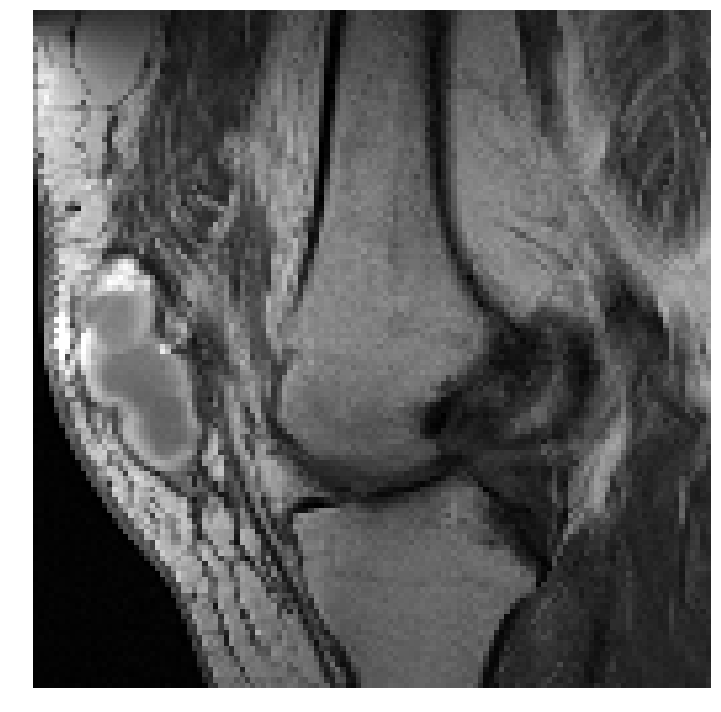

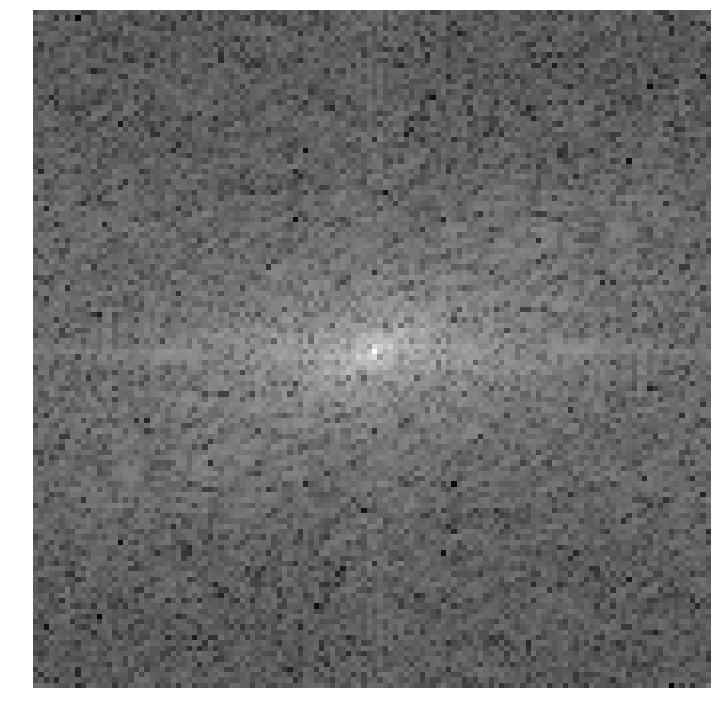

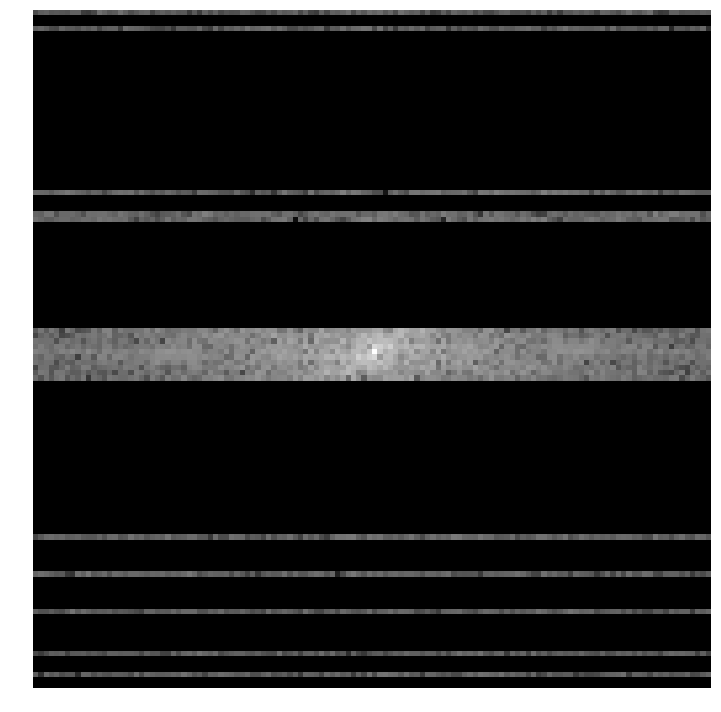

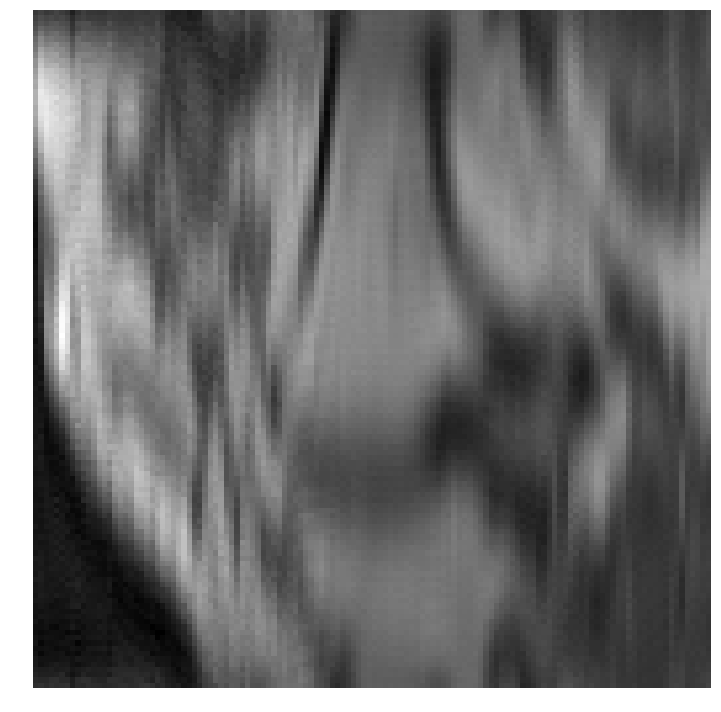

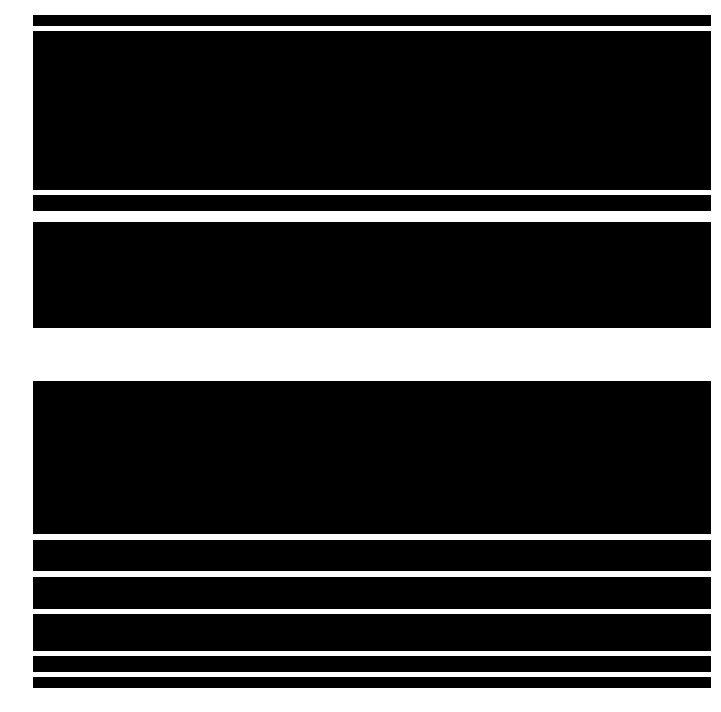

In [56]:
log = lambda s: np.log(s)

which=5
imn = data['gt'][which][0]
kspace = np.fft.fftshift(np.fft.fft2(imn))
# kspace[20:25,:] = 0
plt.figure(figsize=(10,10))
plt.imshow(imn, cmap='gray')
# plt.title('image')
plt.axis('off')
plt.tight_layout()
plt.figure(figsize=(10,10))

plt.imshow(np.log(np.absolute(kspace)), cmap='gray')
# plt.title('magnitude')
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10,10))
mask = np.zeros_like(kspace).astype(np.float32)
mask[60:70,:] = 1
for i in np.random.randint(0,128,10):
    mask[i,:] = 1
# kspace = np.log(np.absolute(kspace)) * mask
kspace_vis = np.log(np.absolute(kspace))
kspace_vis = kspace_vis - kspace_vis.min()
kspace_vis = kspace_vis * mask
plt.imshow(kspace_vis, cmap='gray')
# plt.title('masked kspace')
plt.axis('off')
plt.tight_layout()
ifft_img = np.fft.ifft2(np.fft.ifftshift(kspace * mask))

plt.figure(figsize=(10,10))
plt.imshow(ifft_img.real, cmap='gray')
# plt.title('ifft_img')
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
# plt.title('mask')
plt.axis('off')
plt.tight_layout()

In [17]:
kspace.shape

(128, 128)